In [1]:
import graphlab

In [2]:
chem = graphlab.SFrame("Boonsong Lekagul waterways readings.csv")

This non-commercial license of GraphLab Create for academic use is assigned to vung.pham@ttu.edu and will expire on June 18, 2019.


[INFO] graphlab.cython.cy_server: GraphLab Create v2.1 started. Logging: /tmp/graphlab_server_1529448808.log


Finished parsing file /Users/idvlab/Documents/TTU/htdocs/VAST2018/mc2/Boonsong Lekagul waterways readings.csv

Parsing completed. Parsed 100 lines in 0.246207 secs.

------------------------------------------------------
Inferred types from first 100 line(s) of file as 
column_type_hints=[int,float,str,str,str]
If parsing fails due to incorrect types, you can correct
the inferred type list above and pass it to read_csv in
the column_type_hints argument
------------------------------------------------------


Finished parsing file /Users/idvlab/Documents/TTU/htdocs/VAST2018/mc2/Boonsong Lekagul waterways readings.csv

Parsing completed. Parsed 136824 lines in 0.113355 secs.

In [5]:
graphlab.canvas.set_target('browser')

In [6]:
chem.show()

Canvas is accessible via web browser at the URL: http://localhost:55874/index.html
Opening Canvas in default web browser.


In [7]:
import plotly
plotly.tools.set_credentials_file(username='phamvanvung', api_key='T9A23irvuJyYV7poUFgA')
import plotly.plotly as py
import plotly.graph_objs as go
import numpy as np
from dateutil.parser import parse

In [8]:
boonsri = chem[chem["location"]=="Boonsri"]
boonsri_Methylosmoline = boonsri[boonsri["measure"]=="Methylosmoline"]
x = boonsri_Methylosmoline["sample date"]
x = x.apply(parse)
y = boonsri_Methylosmoline["value"]
trace = go.Scatter(
    x = list(x),
    y = list(y)
)


In [9]:
boonsri.num_rows

<bound method SFrame.num_rows of Columns:
	id	int
	value	float
	location	str
	sample date	str
	measure	str

Rows: Unknown

Data:
+------+-------+----------+-------------+---------------------------+
|  id  | value | location | sample date |          measure          |
+------+-------+----------+-------------+---------------------------+
| 2221 |  2.0  | Boonsri  |  11-Jan-98  |     Water temperature     |
| 2223 |  9.1  | Boonsri  |  11-Jan-98  |      Dissolved oxygen     |
| 2227 |  0.33 | Boonsri  |  11-Jan-98  |          Ammonium         |
| 2228 |  0.01 | Boonsri  |  11-Jan-98  |          Nitrites         |
| 2229 |  1.47 | Boonsri  |  11-Jan-98  |          Nitrates         |
| 2230 |  0.06 | Boonsri  |  11-Jan-98  | Orthophosphate-phosphorus |
| 2231 |  0.09 | Boonsri  |  11-Jan-98  |      Total phosphorus     |
| 2232 |  13.9 | Boonsri  |  11-Jan-98  |           Sodium          |
| 2233 |  3.5  | Boonsri  |  11-Jan-98  |         Potassium         |
| 2234 |  52.0 | Boonsri  |  11

In [10]:
boonsri_Water_temperature = boonsri[boonsri["measure"]=="Water temperature"]
x = boonsri_Water_temperature["sample date"]
x = x.apply(parse)
y = boonsri_Water_temperature["value"]
trace_Water_temperature = go.Scatter(
    x = list(x),
    y = list(y)
)

In [11]:
data = [trace, trace_Water_temperature]
py.iplot(data)

In [12]:
from numpy import *

In [13]:
import pylab

In [14]:
x.show()

Canvas is accessible via web browser at the URL: http://localhost:55874/index.html
Opening Canvas in default web browser.


In [17]:
graphlab.canvas.set_target('browser')

In [18]:
x.show()

Canvas is accessible via web browser at the URL: http://localhost:50514/index.html
Opening Canvas in default web browser.


In [15]:
minDate = min(x)

In [16]:
xdays = x.apply(lambda d: (d-minDate).days)

In [17]:
xdays

dtype: int
Rows: 984
[0, 35, 60, 90, 90, 118, 118, 146, 146, 181, 181, 209, 209, 237, 237, 265, 265, 300, 300, 328, 328, 363, 363, 363, 396, 396, 396, 424, 424, 424, 460, 460, 460, 487, 487, 487, 511, 511, 511, 557, 557, 557, 585, 585, 585, 613, 613, 613, 637, 637, 637, 663, 663, 663, 697, 697, 697, 733, 733, 733, 760, 760, 760, 789, 789, 789, 824, 824, 824, 852, 852, 852, 880, 880, 880, 915, 915, 915, 949, 949, 949, 971, 971, 971, 999, 999, 999, 1034, 1034, 1034, 1062, 1062, 1062, 1105, 1105, 1105, 1154, 1154, 1154, 1194, ... ]

In [18]:
z5 = polyfit(xdays, y, 5)
p5 = poly1d(z5)
z2 = polyfit(xdays, y, 2)
p2 = poly1d(z2)

In [19]:
xx = linspace(0, max(xdays), max(xdays)+1)

In [20]:
xx

array([  0.00000000e+00,   1.00000000e+00,   2.00000000e+00, ...,
         6.90600000e+03,   6.90700000e+03,   6.90800000e+03])

In [21]:
p5xx = p5(xx)
p2xx = p2(xx)

In [22]:
print p5xx
print p2xx

[  9.70495451   9.71199168   9.71901967 ...,  17.24356677  17.25038928
  17.25722161]
[ 12.64855121  12.64905808  12.64956489 ...,  14.95175305  14.95191315
  14.9520732 ]


Populating the interactive namespace from numpy and matplotlib


/Users/idvlab/anaconda2/lib/python2.7/site-packages/IPython/core/magics/pylab.py:161: UserWarning:

pylab import has clobbered these variables: ['pylab']
`%matplotlib` prevents importing * from pylab and numpy



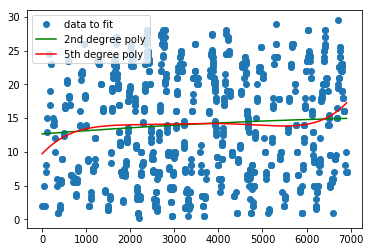

In [23]:
%pylab inline
pylab.plot(xdays, y, 'o', xx, p2xx, '-g', xx, p5xx, '-r')
pylab.legend(['data to fit','2nd degree poly', '5th degree poly'])
pylab.show()

# Summary
## current information
x => date time <br/>
xdays => number of days <br/>
y => the measured values of water temperature <br/>
## what we need to build
feature1 = constant = 1 <br/>
feature2 = t(xdays) = 984 elements <br/>
feature3 = sin(2*Pi*t/365) <br/>
feature4 = cos(2*Pi*t/365) <br/>


In [24]:
feature1 = xdays.apply(lambda d: 1)

In [25]:
feature1

dtype: int
Rows: 984
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ... ]

In [26]:
feature2 = xdays

In [27]:
print math.pi

3.14159265359


In [28]:
feature3 = xdays.apply(lambda d: math.sin(2*math.pi*d/365))

In [29]:
feature4 = xdays.apply(lambda d: math.cos(2*math.pi*d/365))

In [30]:
boonsri_Water_temperature

id,value,location,sample date,measure
2221,2.0,Boonsri,11-Jan-98,Water temperature
2261,5.0,Boonsri,15-Feb-98,Water temperature
2301,2.0,Boonsri,12-Mar-98,Water temperature
2341,8.0,Boonsri,11-Apr-98,Water temperature
2704,7.0,Boonsri,11-Apr-98,Water temperature
2383,15.0,Boonsri,9-May-98,Water temperature
2745,13.0,Boonsri,9-May-98,Water temperature
2423,24.5,Boonsri,6-Jun-98,Water temperature
2785,24.5,Boonsri,6-Jun-98,Water temperature
2464,19.0,Boonsri,11-Jul-98,Water temperature


In [31]:
boonsri_Water_temperature["feature1"] = feature1
boonsri_Water_temperature["feature2"] = feature2
boonsri_Water_temperature["feature3"] = feature3
boonsri_Water_temperature["feature4"] = feature4

In [32]:
seasonal_model = graphlab.linear_regression.create(boonsri_Water_temperature, target='value', features = ['feature1', 'feature2', 'feature3', 'feature4'])

PROGRESS: Creating a validation set from 5 percent of training data. This may take a while.
          You can set ``validation_set=None`` to disable validation tracking.



WARNING: Detected extremely low variance for feature(s) 'feature1' because all entries are nearly the same.
Proceeding with model training using all features. If the model does not provide results of adequate quality, exclude the above mentioned feature(s) from the input dataset.

Linear regression:

--------------------------------------------------------

Number of examples          : 947

Number of features          : 4

Number of unpacked features : 4

Number of coefficients    : 5

Starting Newton Method

--------------------------------------------------------

+-----------+----------+--------------+--------------------+----------------------+---------------+-----------------+

| Iteration | Passes   | Elapsed Time | Training-max_error | Validation-max_error | Training-rmse | Validation-rmse |

+-----------+----------+--------------+--------------------+----------------------+---------------+-----------------+

| 1         | 2        | 1.027776     | 12.355315          | 6.193387             | 2.246067      | 2.031080        |

+-----------+----------+--------------+--------------------+----------------------+---------------+-----------------+

SUCCESS: Optimal solution found.

In [33]:
ssxx = seasonal_model.predict(boonsri_Water_temperature)

In [34]:
ssxx

dtype: float
Rows: 984
[2.1140407434187054, 2.351338321959247, 4.808666044249174, 9.596868961904782, 9.596868961904782, 14.825979464189565, 14.825979464189565, 19.572711184404834, 19.572711184404834, 23.21338143725852, 23.21338143725852, 23.485289464772265, 23.485289464772265, 21.30649512270022, 21.30649512270022, 17.174925327622322, 17.174925327622322, 10.726456832225892, 10.726456832225892, 5.973815298600109, 5.973815298600109, 2.3030125597499023, 2.3030125597499023, 2.3030125597499023, 2.210148088133373, 2.210148088133373, 2.210148088133373, 4.762852931519442, 4.762852931519442, 4.762852931519442, 10.596508750218383, 10.596508750218383, 10.596508750218383, 15.645331033315074, 15.645331033315074, 15.645331033315074, 19.656783372202618, 19.656783372202618, 19.656783372202618, 23.70555635573114, 23.70555635573114, 23.70555635573114, 22.98988108071311, 22.98988108071311, 22.98988108071311, 19.95612048059443, 19.95612048059443, 19.95612048059443, 16.02445595271857, 16.02445595271857, 16.

In [35]:
x

dtype: datetime
Rows: 984
[datetime.datetime(1998, 1, 11, 0, 0), datetime.datetime(1998, 2, 15, 0, 0), datetime.datetime(1998, 3, 12, 0, 0), datetime.datetime(1998, 4, 11, 0, 0), datetime.datetime(1998, 4, 11, 0, 0), datetime.datetime(1998, 5, 9, 0, 0), datetime.datetime(1998, 5, 9, 0, 0), datetime.datetime(1998, 6, 6, 0, 0), datetime.datetime(1998, 6, 6, 0, 0), datetime.datetime(1998, 7, 11, 0, 0), datetime.datetime(1998, 7, 11, 0, 0), datetime.datetime(1998, 8, 8, 0, 0), datetime.datetime(1998, 8, 8, 0, 0), datetime.datetime(1998, 9, 5, 0, 0), datetime.datetime(1998, 9, 5, 0, 0), datetime.datetime(1998, 10, 3, 0, 0), datetime.datetime(1998, 10, 3, 0, 0), datetime.datetime(1998, 11, 7, 0, 0), datetime.datetime(1998, 11, 7, 0, 0), datetime.datetime(1998, 12, 5, 0, 0), datetime.datetime(1998, 12, 5, 0, 0), datetime.datetime(1999, 1, 9, 0, 0), datetime.datetime(1999, 1, 9, 0, 0), datetime.datetime(1999, 1, 9, 0, 0), datetime.datetime(1999, 2, 11, 0, 0), datetime.datetime(1999, 2, 11, 0, 

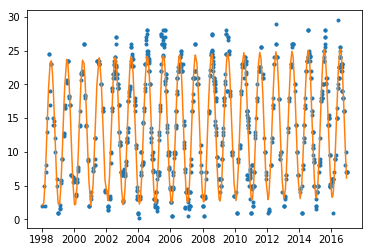

In [36]:
pylab.plot(x, boonsri_Water_temperature['value'], '.', x, ssxx, '-')
pylab.show()

In [37]:
boonsri_Methylosmoline

id,value,location,sample date,measure
889270,0.263,Boonsri,21-Feb-14,Methylosmoline
890814,0.265,Boonsri,21-Feb-14,Methylosmoline
892249,0.33,Boonsri,21-Feb-14,Methylosmoline
889343,0.279,Boonsri,21-Mar-14,Methylosmoline
890887,0.327,Boonsri,21-Mar-14,Methylosmoline
892322,0.279,Boonsri,21-Mar-14,Methylosmoline
889415,0.332,Boonsri,16-May-14,Methylosmoline
890960,0.252,Boonsri,16-May-14,Methylosmoline
892394,0.329,Boonsri,16-May-14,Methylosmoline
889464,0.288,Boonsri,20-Jun-14,Methylosmoline


In [38]:
boonsri_Methylosmoline_value = boonsri_Methylosmoline['value']

In [39]:
boonsri_Methylosmoline_value.min()

0.001

In [40]:
boonsri_Methylosmoline_value.max()

4.406

In [43]:
bmvalue_range = linspace(boonsri_Methylosmoline_value.min(), boonsri_Methylosmoline_value.max(), 10+1)

In [42]:
bmvalue_range

array([  1.00000000e-03,   4.90444444e-01,   9.79888889e-01,
         1.46933333e+00,   1.95877778e+00,   2.44822222e+00,
         2.93766667e+00,   3.42711111e+00,   3.91655556e+00,
         4.40600000e+00])

(array([ 2.,  1.,  3., ...,  0.,  0.,  1.]),
 array([  1.00000000e-03,   3.20250000e-03,   5.40500000e-03, ...,
          4.40159500e+00,   4.40379750e+00,   4.40600000e+00]),
 <a list of 2000 Patch objects>)

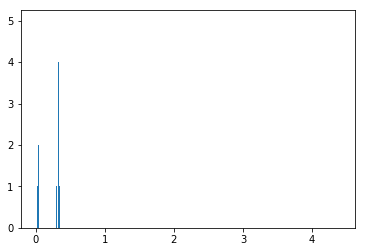

In [49]:
pylab.hist(boonsri_Methylosmoline_value, bins=2000)

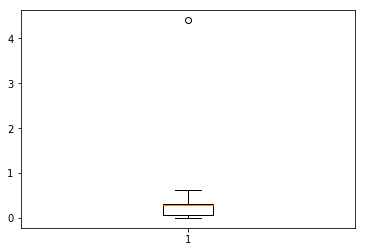

In [51]:
r = pylab.boxplot(boonsri_Methylosmoline_value)

In [52]:
r

{'boxes': [<matplotlib.lines.Line2D at 0x1250dda50>],
 'caps': [<matplotlib.lines.Line2D at 0x1251a9810>,
 'fliers': [<matplotlib.lines.Line2D at 0x1252b4510>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x125257b50>],
 'whiskers': [<matplotlib.lines.Line2D at 0x1250f84d0>,
  <matplotlib.lines.Line2D at 0x12514ae50>]}

In [55]:
r['fliers'][0].get_data()[1]

array([ 4.406])